In [ ]:
import pandas as pd
from DataTransform import DataTransform
from DataFrameInfo import DataFrameInfo
from DataFrameTransform import DataFrameTransform
from Plotter import Plotter


In [ ]:
transformer = DataTransform()

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

In [ ]:
df = pd.read_csv('/Users/moustafarashed/EDA_Projects/exploratory-data-analysis---customer-loans-in-finance410/loan_payments.csv')

In [ ]:
df.head()

In [ ]:
unique_count = df.nunique()

# Creating a DataFrame to display column names and their unique value counts
unique_count_df = pd.DataFrame({'Column Name': unique_count.index, 'Unique Values Count': unique_count.values})

# Displaying the DataFrame
print(unique_count_df)

In [ ]:
categorical_columns = ['term', 'grade','sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status','payment_plan', 'purpose', 'policy_code', 'application_type']

In [ ]:
df = transformer.convert_to_categorical(df, categorical_columns)

In [ ]:
date_time_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date'	,'last_credit_pull_date']

In [ ]:
df = transformer.convert_to_datetime(df, date_time_columns)

In [ ]:
numeric_columns = ['funded_amount','annual_inc', 'mths_since_last_delinq',	'mths_since_last_record','mths_since_last_major_derog']

In [ ]:
df = transformer.convert_to_numeric(df, numeric_columns)

In [ ]:
nan_counts = df[numeric_columns].isna().sum()
nan_counts

In [ ]:
df_info  = DataFrameInfo(df)

In [146]:
print(df_info.check_data_types())
print(df_info.statistical_values())
#print(df_info.count_distinct_values())

print(df_info.null_values())
print(df_info.percentage_null_values())
df_info.print_df_shape()

id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term                                 category
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
correlation_matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the correlation matrix
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# set thins up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(correlation_matrix, mask=mask, 
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

In [ ]:
df_transform = DataFrameTransform(df)

In [ ]:
column_to_drop = ['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date','mths_since_last_major_derog']


In [ ]:
#file keeps freezing when i use the method in the class, so i directly used pandas to handle the missing values
df = df.drop(columns=column_to_drop, axis=1)
#how can i use the p value to check the MCAR????

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(subset=['last_payment_date'], inplace=True)


In [ ]:
df.dropna(subset=['collections_12_mths_ex_med'], inplace=True)


In [ ]:
df['term'].fillna(df['term'].mode()[0], inplace=True)

In [ ]:
df['funded_amount'].fillna(df['funded_amount'].mean(), inplace=True)

In [ ]:
df.dropna(subset=['last_credit_pull_date'], inplace=True)


In [ ]:
df['int_rate'].fillna(df['int_rate'].mean(), inplace=True)

In [ ]:
df['employment_length'].fillna(df['employment_length'].mode()[0], inplace=True)

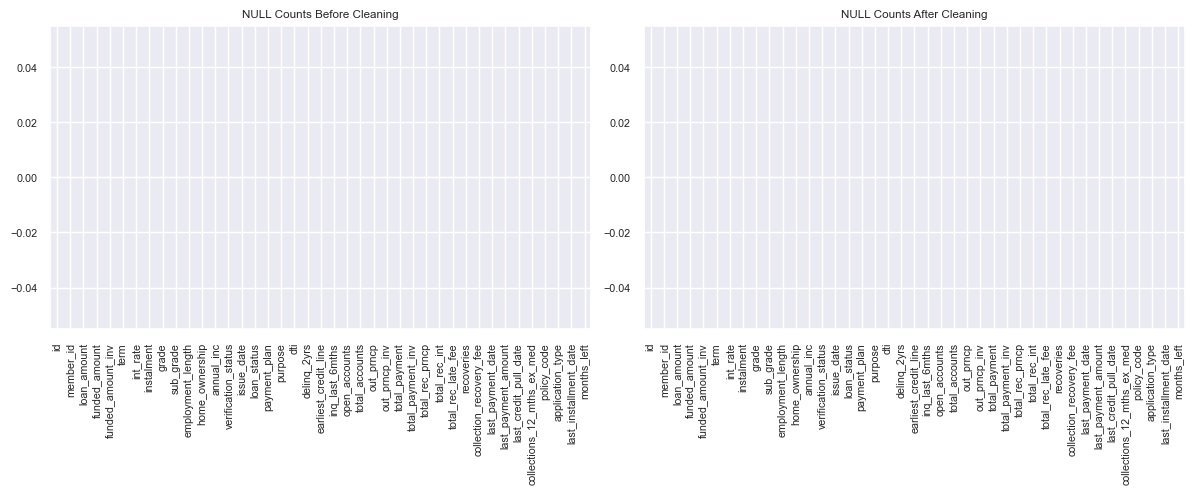

In [147]:
# Create an instance of the Plotter class
plotter = Plotter()

# Assuming 'df' is your DataFrame, pass it to the visualize_nulls method
plotter.visualize_nulls(df)

In [ ]:
numeric_cols = df.select_dtypes(include=['number'])
for i in numeric_cols:
    print(i)

In [ ]:
skewed_columns = [col for col in numeric_cols if df[col].skew() > 0.5]
skewed_columns

In [ ]:
skewness  = numeric_cols.skew()
skewness

In [ ]:
skewness  = df[skewed_columns].skew()
skewness

In [ ]:
for col in numeric_cols:
    df[col] = np.log1p(df[col])

In [ ]:
new_skewness = df[skewed_columns].skew()
new_skewness

In [ ]:
plotter.visualize_skew(df)

In [ ]:
plotter.visualize_skew_sns(df, skewed_columns)

In [ ]:
for col in skewed_columns:
    if df[col].skew() > 0.5:  # threshhold
        df[col] = np.log1p(df[col]) 

In [ ]:
plotter.visualize_skew_sns(df, skewed_columns)

In [ ]:
plotter.visualize_outliers(df, numeric_cols)

In [ ]:
cleaned_numeric_column = transformer.remove_outliers(df, numeric_cols)

In [ ]:
plotter.visualize_outliers(df, cleaned_numeric_column)

In [ ]:
numeric_cor = numeric_cols.corr()
numeric_cor

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(numeric_cor, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 8})
plt.title('Numeric columns correlation after handling nulls')
plt.show()

In [ ]:
corr_threshhold = 0.90
# Create a mask to identify highly correlated features
upper = numeric_cor.where(np.triu(np.ones(numeric_cor.shape), k=1) == 1)
highly_correlated_columns = [column for column in upper.columns if any(upper[column] > corr_threshhold)]


In [ ]:
print("Highly Correlated Columns:", highly_correlated_columns)


In [ ]:
#df_without_highly_correlated_columns = df.drop(highly_correlated_columns, axis=1)


In [ ]:
#df_without_highly_correlated_columns.head()

In [ ]:
#calculate the total recovery percantage and total funded percentage using the funded_amount_inv as the funded amount column has been removed in the transformation
#df['recovery_percentage'] = (df['recoveries']/df['funded_amount_inv'])*100
#df['total_payment_percentage'] = (df['total_payment']/df['funded_amount_inv'])*100

#filtered_recovery = df['recovery_percentage'][np.isfinite(df['recovery_percentage'])]
#filtered_total_payment = df['total_payment_percentage'][np.isfinite(df['total_payment_percentage'])]

In [ ]:
total_recovery = df['total_rec_prncp'].sum()
total_funded = df['funded_amount'].sum()
print('Total recovery = ',total_recovery,' Total funded = ', total_funded)

In [148]:
for i in df:
    print(i)

id
member_id
loan_amount
funded_amount
funded_amount_inv
term
int_rate
instalment
grade
sub_grade
employment_length
home_ownership
annual_inc
verification_status
issue_date
loan_status
payment_plan
purpose
dti
delinq_2yrs
earliest_credit_line
inq_last_6mths
open_accounts
total_accounts
out_prncp
out_prncp_inv
total_payment
total_payment_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_payment_date
last_payment_amount
last_credit_pull_date
collections_12_mths_ex_med
policy_code
application_type
last_installment_date
months_left


In [ ]:

# Data for the pie chart
percentages = [total_recovery, total_funded]
labels = ['Recovery Percentage', 'Total funded Percentage']

# Plotting the pie chart
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Contribution of Recovery and Total Payment Percentages')
plt.show()


In [ ]:
#extract the number of month from term column and convert it to integer
df['term'] = df['term'].str.extract('(\d+)', expand=False).astype(int)


In [ ]:
df['issue_date'] = pd.to_datetime(df['issue_date'])

last_installment_dates = []
for index, row in df.iterrows():
    last_installment_date = row['issue_date'] + pd.DateOffset(months=row['term'])
    last_installment_dates.append(last_installment_date)

# Add the calculated dates as a new column
df['last_installment_date'] = last_installment_dates

In [ ]:
#another column how many month left which is the last installment- the last paymentdate need to be integer dt

df['months_left'] = (df['last_installment_date'] - df['last_payment_date']) // pd.Timedelta(days=30)
negative_values_count = (df['months_left'] < 0).sum()
print(negative_values_count)


In [ ]:
max_6_months = df[df['months_left'] <= 6]

# Sum the amounts for loans with a maximum term of 6 months
sum_installments_max_6_months = max_6_months['instalment'].sum()

print("Total amount of installments for loans with a maximum term of 6 months:", sum_installments_max_6_months)

In [ ]:
df.head()

In [ ]:
#create a new column for the last installment will be paid.(the term plus issue_date). 
#another column how many month left which is the last installment- the last paymentdate need to be integer dt

#filtering by creating 2 df , one for the less than 6 month left and another for the rest
#for the less than 6 month month left * intsallment.
#for the other df installment column * 6 
#sum of both df instalment amount compared to the funded amount

In [ ]:
#calculating loss
#filtering by charged off loans
charged_off_loans = df[df['loan_status']=='Charged Off']
len(charged_off_loans)

In [ ]:
charged_off_loans.head()

In [ ]:
#charged off loans total paymennts
total_loss_for_charged_off_loans = charged_off_loans['total_payment'].sum()
total_loss_for_charged_off_loans

In [ ]:
#percentage of charged off loans
percentage_of_charged_off_loans_against_all_loans = (charged_off_loans.shape[0]/df.shape[0])*100
percentage_of_charged_off_loans_against_all_loans

In [ ]:
#calculate projected loss
projected_loss = (charged_off_loans['instalment']*charged_off_loans['term']) - charged_off_loans['total_payment']

projected_loss_sum = (charged_off_loans['instalment']*charged_off_loans['term']).sum() - charged_off_loans['total_payment'].sum()
projected_loss_sum

In [ ]:
remaining_term = charged_off_loans['months_left']
charged_off_loans['potential_revenue_loss'] = projected_loss / remaining_term


In [ ]:
aggregated_loss = charged_off_loans.groupby('months_left')['potential_revenue_loss'].sum()


In [ ]:
plt.figure(figsize=(12, 8))
aggregated_loss.plot(kind='bar', color='skyblue')
plt.xlabel('Remaining Term')
plt.ylabel('Aggregated Projected Loss')
plt.title('Aggregated Projected Loss of Charged Off Loans over Remaining Term')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#calculate possible loss
#list all loan status to decide which of them to use
unique_loan_status = df['loan_status'].unique()
for each_status in unique_loan_status:
    print(each_status)

In [ ]:
#filter by late payments and calculate the percentage against all loans, and the number of late payers
late_payments = df[df['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period'])]
#percentage of loans behind in their payments but not yet charged off
late_payment_percentage = (len(late_payments))/(len(df))*100
#number of loans late in payments 
total_number_of_late_payers = len(late_payments)
total_number_of_late_payers

In [ ]:
#calculating the total amount of projected loss for late payers after subtracting what they have paid so far
late_payments['remaining balance'] = (late_payments['instalment']*late_payments['term'])-late_payments['total_payment']
total_loss_if_not_transfered_to_charged_off = late_payments['remaining balance'].sum()
print(total_loss_if_not_transfered_to_charged_off)


In [ ]:
#total loss for both charged off loans plus late loans
total_loss= total_loss_if_not_transfered_to_charged_off + aggregated_loss
total_loss.sum()

In [ ]:
#percentage of number of all loans that are charged off or late on payments against total number of loans
print(len(total_loss) / len(df)*100)

In [ ]:
(total_loss.sum()/df['loan_amount'].sum())*100

In [ ]:
#indicators of loss
# Analyzing loan purpose
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

charged_off_loans['purpose'].value_counts().plot(kind='bar', ax=axs[0], title='Charged Off - Loan Purpose')
late_payments['purpose'].value_counts().plot(kind='bar', ax=axs[1], title='Late Payments - Loan Purpose')

plt.tight_layout()
plt.show()


In [ ]:
#analysing home ownership
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

charged_off_loans['home_ownership'].value_counts().plot(kind='bar', ax=axs[0], title='Charged Off - Home Ownership')
late_payments['home_ownership'].value_counts().plot(kind='bar', ax=axs[1], title='Late Payments - Home Ownership')

plt.tight_layout()
plt.show()

In [ ]:
#analysing loan grades
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

charged_off_loans['grade'].value_counts().sort_index().plot(kind='bar', ax=axs[0], title='Charged Off - Loan Grades')
late_payments['grade'].value_counts().sort_index().plot(kind='bar', ax=axs[1], title='Late Payments - Loan Grades')

plt.tight_layout()
plt.show()

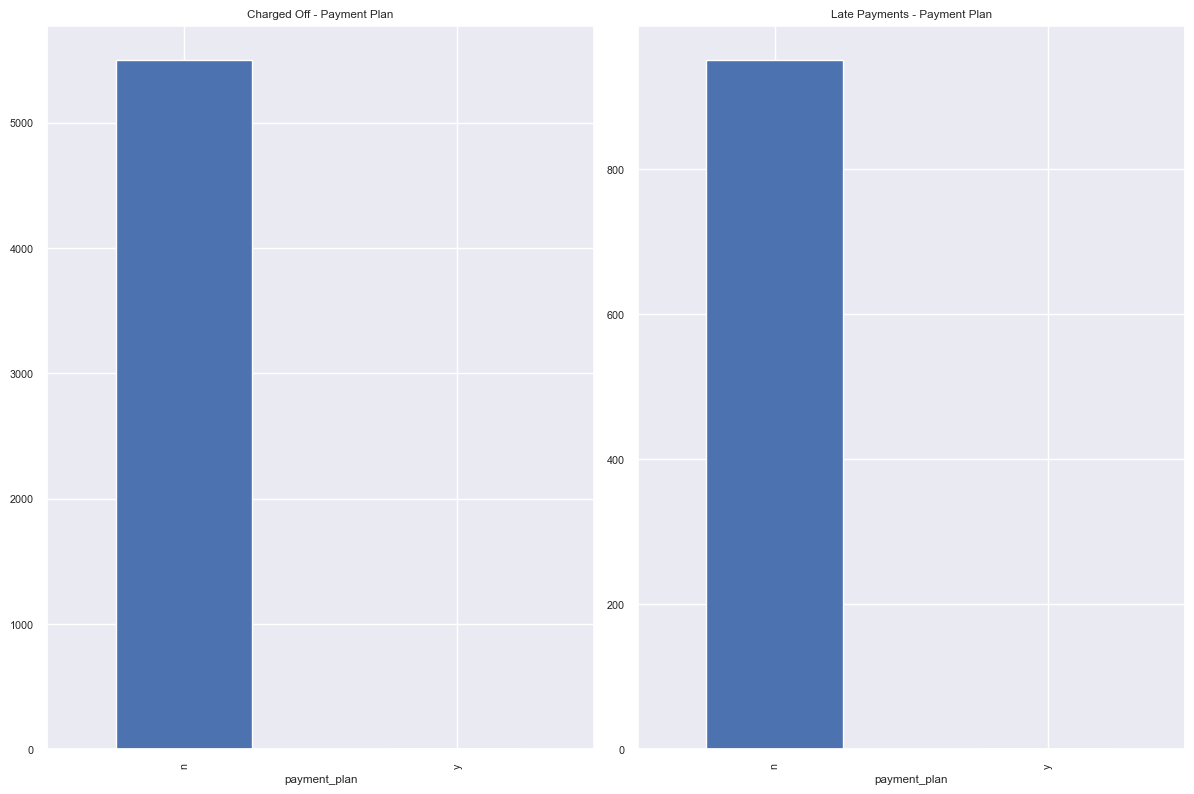

In [150]:
#analysing payment plan
fig, axs = plt.subplots(1,2, figsize = (12,8))

charged_off_loans['payment_plan'].value_counts().plot(kind = 'bar', ax=axs[0], title = 'Charged Off - Payment Plan')
late_payments['payment_plan'].value_counts().plot(kind = 'bar', ax=axs[1], title = 'Late Payments - Payment Plan')
plt.tight_layout()

plt.show()

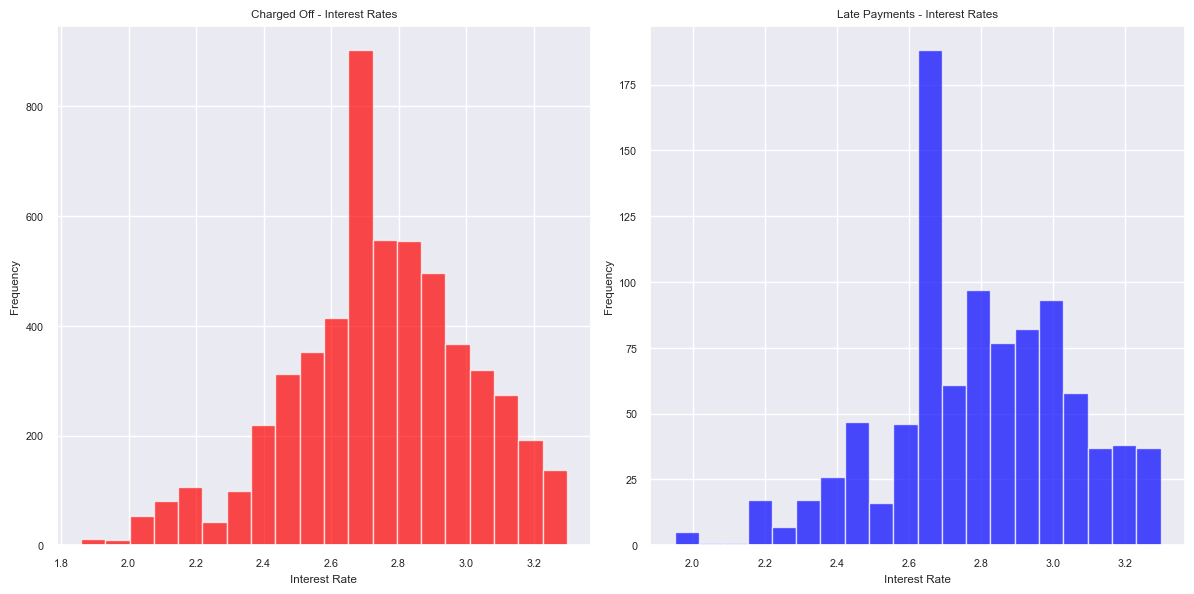

In [151]:
#analysing intereset rate
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

charged_off_loans['int_rate'].hist(ax=axs[0], bins=20, color='red', alpha=0.7)
axs[0].set_title('Charged Off - Interest Rates')
axs[0].set_xlabel('Interest Rate')
axs[0].set_ylabel('Frequency')

late_payments['int_rate'].hist(ax=axs[1], bins=20, color='blue', alpha=0.7)
axs[1].set_title('Late Payments - Interest Rates')
axs[1].set_xlabel('Interest Rate')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()